In [1]:
from pyFluxim import LL, utils
import matplotlib.pyplot as plt
import os
import numpy as np
from datetime import timedelta, datetime
import pandas as pd
%matplotlib inline

# Open the Litos Lite save file .lls
#path = os.path.expanduser("~/Downloads/second week measurements.lls")
path = os.path.expanduser(r'Z:\measurements_and_simulations\0008_LitosLite_Tests\2022_03_EPFL_Tests\2022_03_03_EPFL_pero_samples.lls')
# Load the result
A = LL.Result(path)

#display the list of samples
sl = A.getSampleList()
for x in sl:
    print(f"- {x['name']} ({x['devices']} devices)")
    
# Use the first sample for the following examples
sample_name = sl[0]["name"]

- Sample 8 (2 devices)
- Sample 4 (2 devices)
- Sample 3 (2 devices)
- Sample 7 (2 devices)
- Sample 6 (2 devices)
- Sample 1 (2 devices)
- Sample 5 (2 devices)
- Sample 2 (2 devices)


In [2]:
# retrieve the index of all stressing recipes
resCV = [i for i,x in enumerate(A.getResultsTypes(sample_name)) if x=="CV"]
# retrieve the index of all JS recipes
resJV = [i for i,x in enumerate(A.getResultsTypes(sample_name)) if x=="JV"]

In [3]:
# retrieve the start time of the experiment
t0 = [A.getResultStartTime(sample_name, r) for r in resCV]

In [4]:
#retrieve a disctionary with all the result of the measurement (units are SI: so voltage in (V) and current in (A))
r = A.getResult(sample_name, 0, resCV[1])
r

{'type': 'Stress',
 't': array([ 0.6076889,  1.2828645,  2.136529 ,  3.0009305,  4.337498 ,
         5.1912074,  6.051606 ,  7.3897643,  8.241741 ,  9.09143  ,
        10.438809 , 11.294207 , 12.15703  , 13.014445 , 14.394861 ,
        15.247806 , 16.10989  , 17.447601 , 18.308132 , 19.158531 ,
        20.021446 , 21.362167 , 22.211199 , 23.062912 , 24.402048 ,
        25.254686 , 26.114065 , 27.455782 , 28.306797 , 29.16627  ,
        30.03106  , 31.476566 , 32.480877 , 33.48161  , 34.489304 ,
        35.512444 , 36.529118 , 37.53443  , 38.538204 , 39.563328 ,
        40.571507 , 41.578625 , 42.466305 , 43.470078 , 44.330128 ,
        45.334053 , 46.341236 , 47.344814 , 48.35795  , 49.356766 ,
        50.376007 , 51.399994 , 52.64928  , 53.50053  , 54.36205  ,
        55.356464 , 56.216774 , 57.076893 , 58.44336  , 59.29812  ,
        60.1576   ], dtype=float32),
 'voltage': array([-0.02318668,  0.0501902 ,  0.16253589,  0.3347207 ,  0.6340431 ,
         0.9260095 ,  1.0613528 ,  0.94

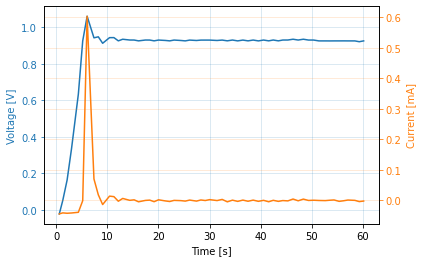

In [5]:
# You can quickly plot the rsult
r = A.plotResult(sample_name, 0, resCV[1])

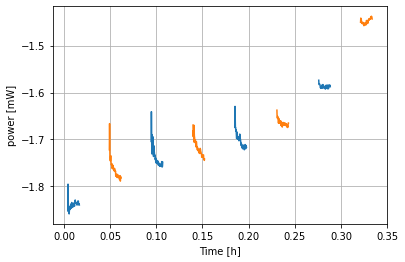

In [6]:
# Here we will concatenate all stressing results of a given DUT using relative time
skip = 15 # by setting skip to 10 or larger we can remove the initial spike of each measurement
for i in range(4,len(resCV)):
    pixelID = 0 # This means pixel 1 has the ID is 0-indexed
    resID = resCV[i] # the ID of the result. Here we take all stressing from the 4th and skipping the 4 last values
    r = A.getResult(sample_name, pixelID, resID) # Retrieve the result for the sample named "Sample 1" for the 1st pixel
    V = r['voltage'][skip:] # voltage (skipping the first spiky points)
    I = r['current'][skip:] # current (skipping the first spiky points)
    plt.plot((r['t'][skip:]+(t0[i]-t0[4]).total_seconds())/3600, 1e3*V*I,f'C{i%2}') # plot the power in function of the relative time
plt.xlabel("Time [h]")
plt.grid();
plt.ylabel("power [mW]");

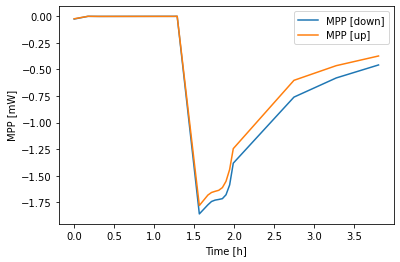

In [7]:
ax = A.plotJVparams(sample_name, 0, "MPP", up=False)
ax = A.plotJVparams(sample_name, 0, "MPP", up=True, ax=ax)